In [124]:
# Importing necessary libraries for

# Data analysis and manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Training testing split
from sklearn.model_selection import train_test_split

# Importing Classifier Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importing accuracy metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [125]:
# Data loading
WeatherData = pd.read_csv("/content/weather_prediction_dataset.csv")

In [126]:
# Checking the information about the data
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [127]:
# Printing the first few data values
WeatherData.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [128]:
# Printing the last few data values
WeatherData.tail()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9
3653,20100101,1,8,0.93,0.9965,0.08,0.56,0.0,2.9,-0.2,...,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.00,0.5,-0.7,1.8


In [129]:
# Checking the descriptive stats of the data
WeatherData.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [130]:
# Checking for missing values
WeatherData.isnull().sum()

,0
DATE,0
MONTH,0
BASEL_cloud_cover,0
BASEL_humidity,0
BASEL_pressure,0
...,...
TOURS_global_radiation,0
TOURS_precipitation,0
TOURS_temp_mean,0
TOURS_temp_min,0


In [131]:
# Data Type Distribution
WeatherData.dtypes.value_counts()

,count
float64,150
int64,15


In [132]:
# Unique Values for Features
for column in WeatherData.columns:
  print(f"\nUnique values in {column}: {WeatherData[column].nunique()}")


Unique values in DATE: 3654

Unique values in MONTH: 12

Unique values in BASEL_cloud_cover: 9

Unique values in BASEL_humidity: 60

Unique values in BASEL_pressure: 436

Unique values in BASEL_global_radiation: 346

Unique values in BASEL_precipitation: 239

Unique values in BASEL_sunshine: 153

Unique values in BASEL_temp_mean: 341

Unique values in BASEL_temp_min: 309

Unique values in BASEL_temp_max: 393

Unique values in BUDAPEST_cloud_cover: 9

Unique values in BUDAPEST_humidity: 74

Unique values in BUDAPEST_pressure: 429

Unique values in BUDAPEST_global_radiation: 342

Unique values in BUDAPEST_precipitation: 195

Unique values in BUDAPEST_sunshine: 149

Unique values in BUDAPEST_temp_mean: 376

Unique values in BUDAPEST_temp_max: 415

Unique values in DE_BILT_cloud_cover: 9

Unique values in DE_BILT_wind_speed: 85

Unique values in DE_BILT_wind_gust: 27

Unique values in DE_BILT_humidity: 62

Unique values in DE_BILT_pressure: 496

Unique values in DE_BILT_global_radiation: 

In [133]:
# Checking for duplicate rows
DuplicateRows = WeatherData[WeatherData.duplicated()]
print(f"\nNumber of duplicate rows: {len(DuplicateRows)}")


Number of duplicate rows: 0


In [134]:
# Converting the 'DATE' column to a datetime format
WeatherData['DATE'] = pd.to_datetime(WeatherData['DATE'], format='%Y%m%d')

In [135]:
# Selecting the columns for distribution of some key variables
VariablesOfInterest = ['BASEL_precipitation', 'BASEL_temp_mean', 'TOURS_precipitation',
                       'TOURS_temp_mean', 'TOURS_wind_speed']

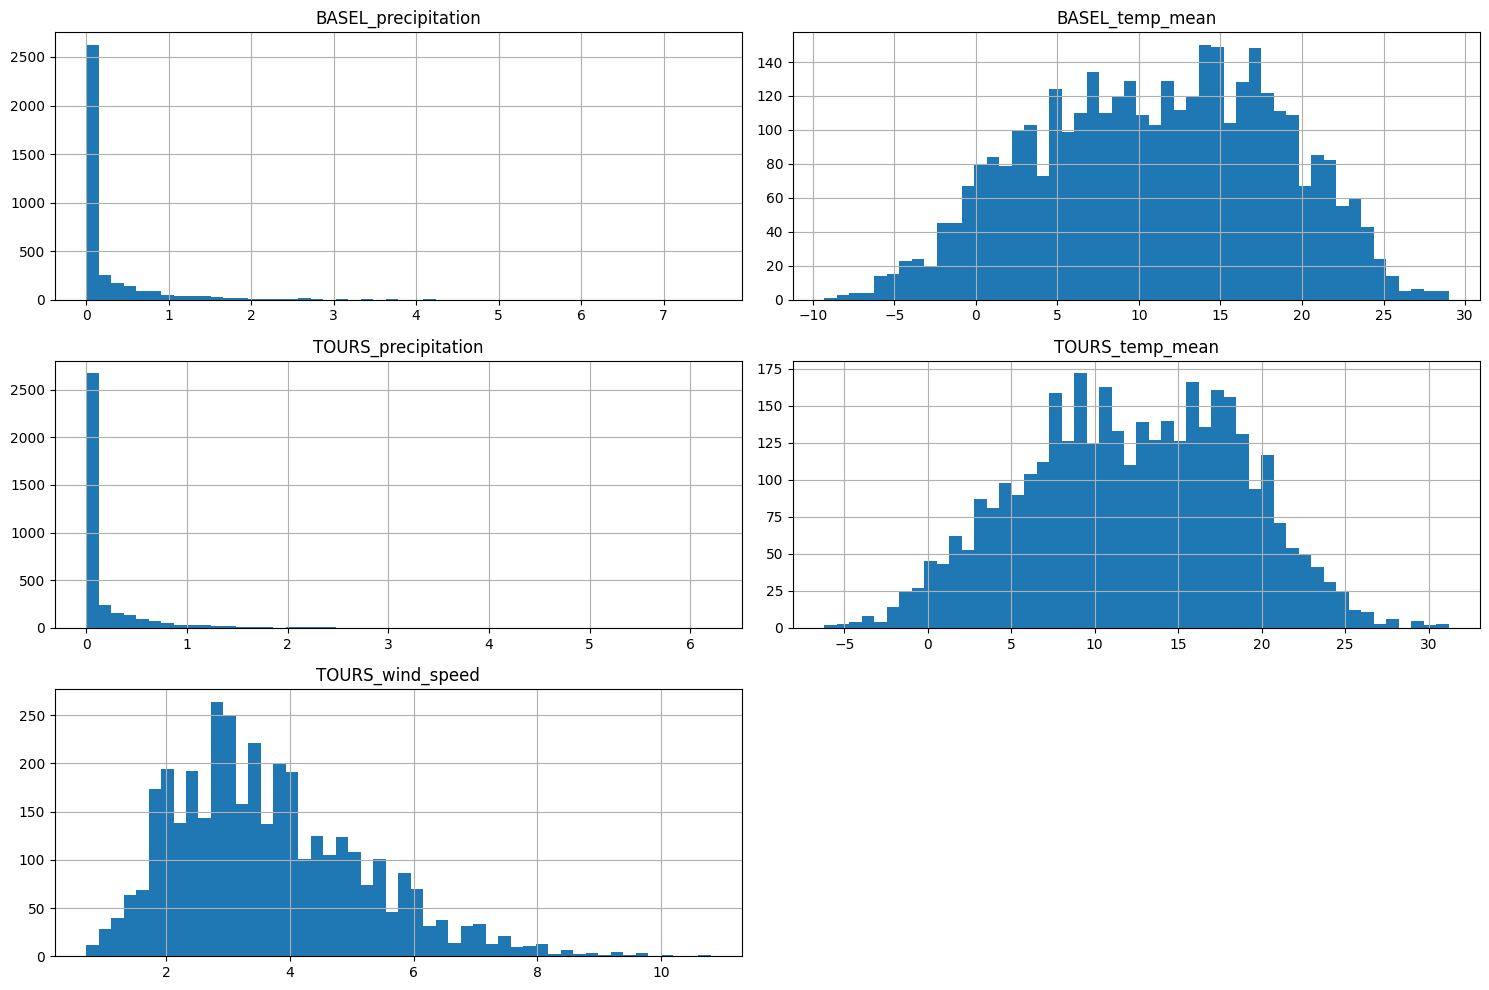

In [136]:
# Plotting distribution of key variables to identify thresholds for high-impact events
WeatherData[VariablesOfInterest].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

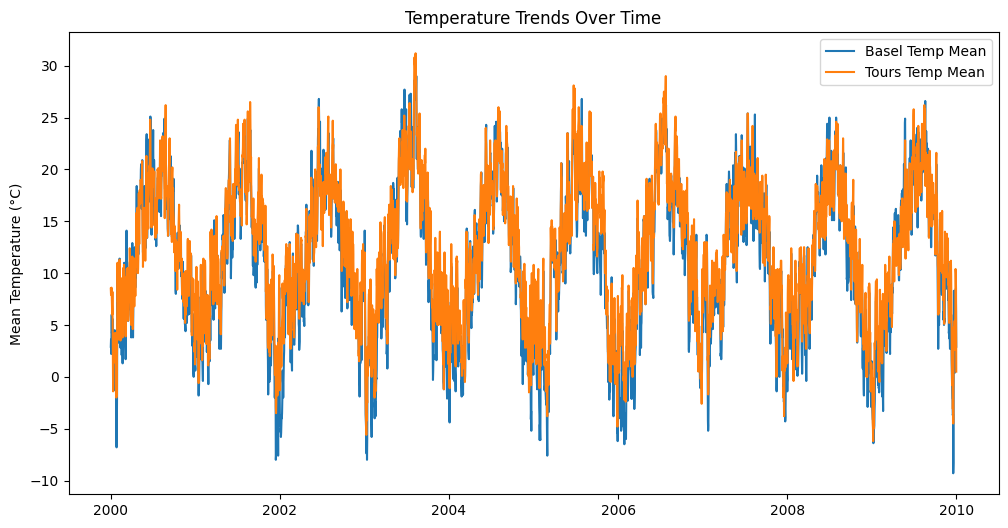

In [137]:
# Plotting time-series for Basel Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(WeatherData['DATE'], WeatherData['BASEL_temp_mean'], label='Basel Temp Mean')
plt.plot(WeatherData['DATE'], WeatherData['TOURS_temp_mean'], label='Tours Temp Mean')
plt.title('Temperature Trends Over Time')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

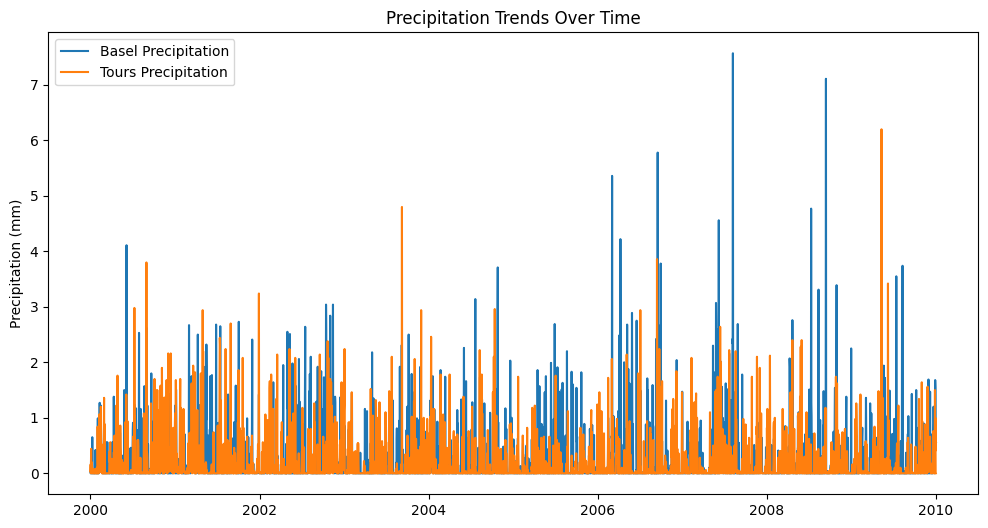

In [138]:
# Plotting time-series for Precipitation Trends
plt.figure(figsize=(12, 6))
plt.plot(WeatherData['DATE'], WeatherData['BASEL_precipitation'], label='Basel Precipitation')
plt.plot(WeatherData['DATE'], WeatherData['TOURS_precipitation'], label='Tours Precipitation')
plt.title('Precipitation Trends Over Time')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

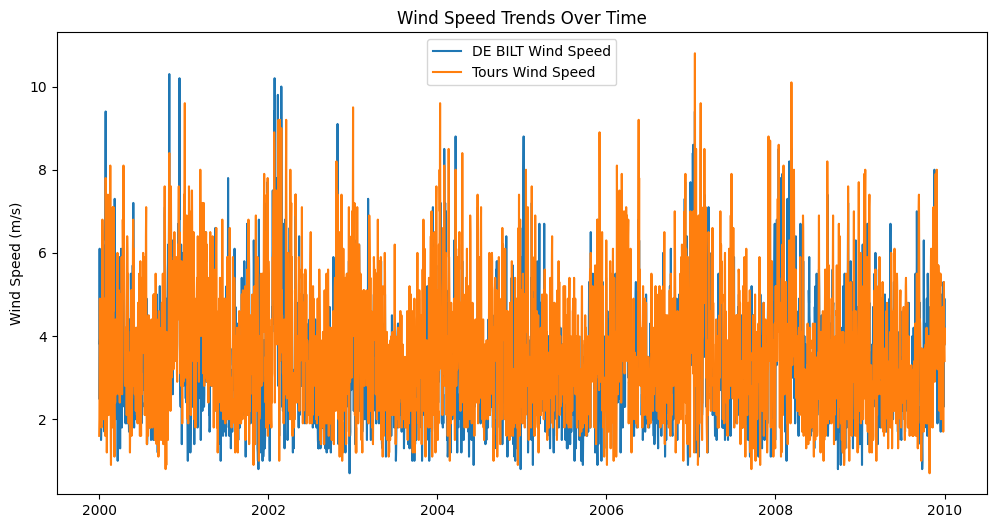

In [139]:
# Plotting time-series for Wind Speed Trends
plt.figure(figsize=(12, 6))
plt.plot(WeatherData['DATE'], WeatherData['DE_BILT_wind_speed'], label='DE BILT Wind Speed')
plt.plot(WeatherData['DATE'], WeatherData['TOURS_wind_speed'], label='Tours Wind Speed')
plt.title('Wind Speed Trends Over Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

In [140]:
# Caclculating Correlation using variables related to precipitation, temperature, and wind speed across different locations.
CorrelationMatrix = WeatherData[['BASEL_precipitation', 'BASEL_temp_mean', 'DE_BILT_wind_speed',
                                   'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_wind_speed']].corr()

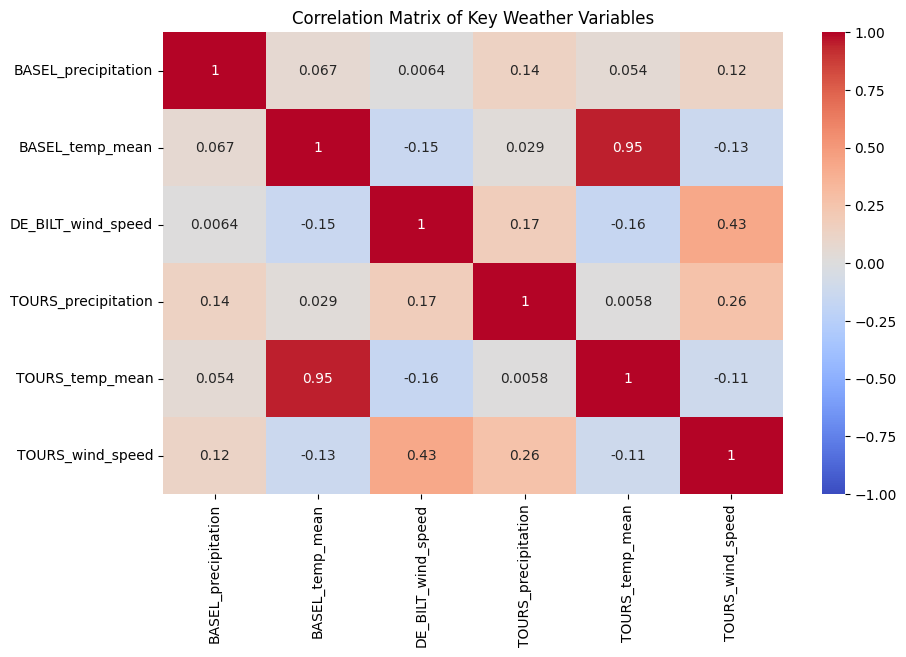

In [141]:
# Plotting the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(CorrelationMatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Weather Variables')
plt.show()

In [142]:
# Defining thresholds for high-impact precipitation and wind speed
PrecipitationThreshold = WeatherData['BASEL_precipitation'].quantile(0.90)  # Top 10% for precipitation
WindSpeedThreshold = WeatherData['DE_BILT_wind_speed'].quantile(0.90)  # Top 10% for wind speed

In [143]:
# Creating binary labels for high-impact events (1 = high-impact, 0 = not high-impact)
WeatherData['high_impact_precipitation'] = (WeatherData['BASEL_precipitation'] >= PrecipitationThreshold).astype(int)
WeatherData['high_impact_wind'] = (WeatherData['DE_BILT_wind_speed'] >= WindSpeedThreshold).astype(int)

In [144]:
# Selecting features for the model
features = ['BASEL_temp_mean', 'BASEL_humidity', 'BASEL_pressure', 'TOURS_temp_mean',
            'TOURS_humidity', 'TOURS_pressure', 'DE_BILT_wind_speed', 'TOURS_wind_speed']

In [145]:
# Setting Target variables
TargetPrecipitation = 'high_impact_precipitation'
TargetWind = 'high_impact_wind'

In [146]:
# Splitting data into train and test sets
X = WeatherData[features]
yPrecipitation = WeatherData[TargetPrecipitation]
yWind = WeatherData[TargetWind]

In [147]:
# Separately splitting for both high-impact precipitation and wind events
X_trainPrecipitation, X_testPrecipitation, y_trainPrecipitation, y_testPrecipitation = train_test_split(X, yPrecipitation, test_size=0.3, random_state=42)
X_trainWind, X_testWind, y_trainWind, y_testWind = train_test_split(X, yWind, test_size=0.3, random_state=42)

In [148]:
# Implementing Random Forest Model for high-impact precipitation prediction
RandomForestPrecipitation = RandomForestClassifier(random_state=42)
RandomForestPrecipitation.fit(X_trainPrecipitation, y_trainPrecipitation)

RandomForestClassifier(random_state=42)

In [149]:
# Making predictions for the Random Forest Precipitation Model using testing data
RandomForestPrecipitationPrediction = RandomForestPrecipitation.predict(X_testPrecipitation)

In [150]:
# Implementing Random Forest Model for high-impact wind prediction
RandomForestModelWind = RandomForestClassifier(random_state=42)
RandomForestModelWind.fit(X_trainWind, y_trainWind)

RandomForestClassifier(random_state=42)

In [151]:
# Making predictions for the Random Forest Wind Model using testing data
RandomForestModelWindPredictions = RandomForestModelWind.predict(X_testWind)

In [152]:
# Calculating the performance of both models
RandomForestPrecipitationReport = classification_report(y_testPrecipitation, RandomForestPrecipitationPrediction)
RandomForestModelWindReport = classification_report(y_testWind, RandomForestModelWindPredictions)

In [153]:
# Printing the performance of Random Forest Model for Precipitation
print("Random Forest Model for High-Impact Precipitation Prediction Performance:\n", RandomForestPrecipitationReport)

Random Forest Model for High-Impact Precipitation Prediction Performance:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       991
           1       0.81      0.21      0.33       106

    accuracy                           0.92      1097
   macro avg       0.87      0.60      0.64      1097
weighted avg       0.91      0.92      0.90      1097



In [154]:
# Printing the performance of Random Forest Model for Wind
print("Random Forest Model for High-Impact Wind Prediction Performance:\n", RandomForestModelWindReport)

Random Forest Model for High-Impact Wind Prediction Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       107

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [155]:
# Implementing Logistic Regression Model for high-impact precipitation prediction
LogisticRegressionPrecipitation = LogisticRegression(random_state=42, max_iter=1000)
LogisticRegressionPrecipitation.fit(X_trainPrecipitation, y_trainPrecipitation)

LogisticRegression(max_iter=1000, random_state=42)

In [156]:
# Making predictions for the Logistic Regression Precipitation Model using testing data
LogisticRegressionPrecipitationPrediction = LogisticRegressionPrecipitation.predict(X_testPrecipitation)

In [157]:
# Calculating the performance of the model
LogisticRegressionPrecipitationReport = classification_report(y_testPrecipitation, LogisticRegressionPrecipitationPrediction)

In [158]:
# Printing the performance of Logistic Regression Model for Precipitation
print("Logistic Regression Model for High-Impact Precipitation Prediction Performance:\n", LogisticRegressionPrecipitationReport)

Logistic Regression Model for High-Impact Precipitation Prediction Performance:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       991
           1       0.67      0.02      0.04       106

    accuracy                           0.90      1097
   macro avg       0.79      0.51      0.49      1097
weighted avg       0.88      0.90      0.86      1097



In [159]:
# Implementing Decision Tree Model for high-impact wind prediction
DecisionTreeModelWind = DecisionTreeClassifier(random_state=42)
DecisionTreeModelWind.fit(X_trainWind, y_trainWind)

DecisionTreeClassifier(random_state=42)

In [160]:
# Making predictions for the Decision Tree Wind Model using testing data
DecisionTreeModelWindPredictions = DecisionTreeModelWind.predict(X_testWind)

In [161]:
# Calculating the performance of the model
DecisionTreeModelWindReport = classification_report(y_testWind, DecisionTreeModelWindPredictions)

In [162]:
# Printing the performance of Decision Tree Model for Wind
print("Decision Tree Model for High-Impact Wind Prediction Performance:\n", DecisionTreeModelWindReport)

Decision Tree Model for High-Impact Wind Prediction Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       107

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [163]:
# Defining a function to plot the model comparison
def ModelComparisonPlottingFunction(models, X_test, y_test, ModelNames):
  metrics = {
      'Accuracy': accuracy_score,
      'Precision': precision_score,
      'Recall': recall_score,
      'F1-Score': f1_score,
  }

  results = {}
  for model, name in zip(models, ModelNames):
    y_pred = model.predict(X_test)
    results[name] = {}
    for MetricName, MetricFunction in metrics.items():
      try:
        results[name][MetricName] = MetricFunction(y_test, y_pred)
      except ValueError:
        results[name][MetricName] = np.nan  # Handling cases where a metric can't be computed

  DataframeResults = pd.DataFrame(results).transpose()

  # Plotting the comparison
  plt.figure(figsize=(12, 6))
  for MetricName in metrics:
    plt.plot(DataframeResults.index, DataframeResults[MetricName], label=MetricName, marker='o')
  plt.title('Model Comparison')
  plt.xlabel('Model')
  plt.ylabel('Score')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [164]:
# Applying the function on the model
models = [RandomForestPrecipitation, LogisticRegressionPrecipitation, RandomForestModelWind, DecisionTreeModelWind]
X_tests = [X_testPrecipitation, X_testPrecipitation, X_testWind, X_testWind]
y_tests = [y_testPrecipitation, y_testPrecipitation, y_testWind, y_testWind]
ModelNames = ['Random Forest (Precipitation)', 'Logistic Regression (Precipitation)', 'Random Forest (Wind)', 'Decision Tree (Wind)']

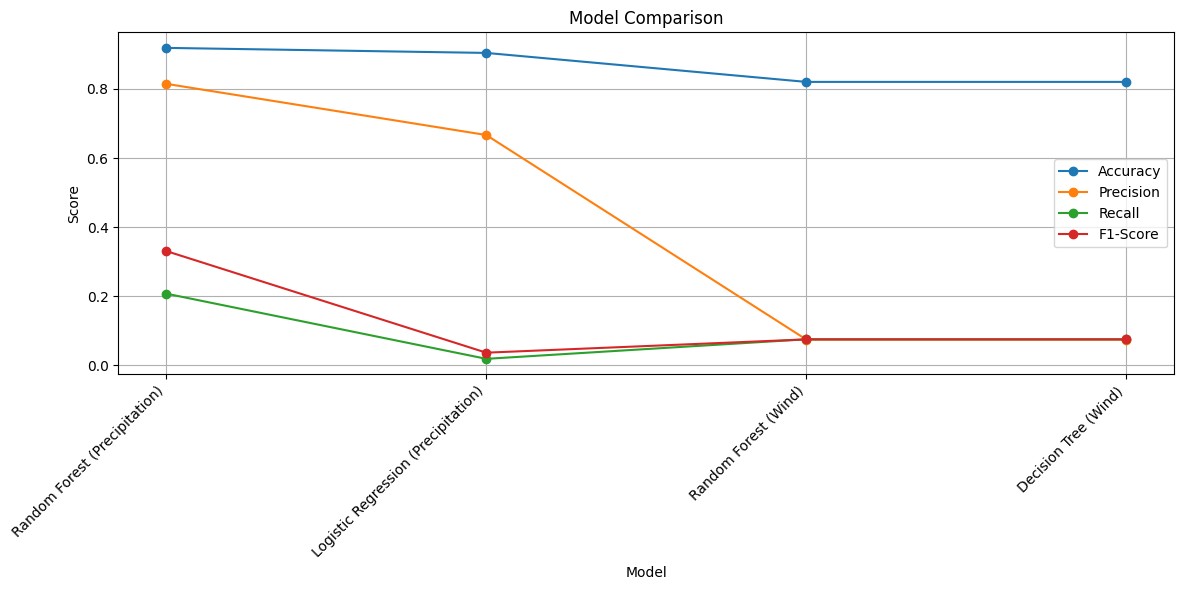

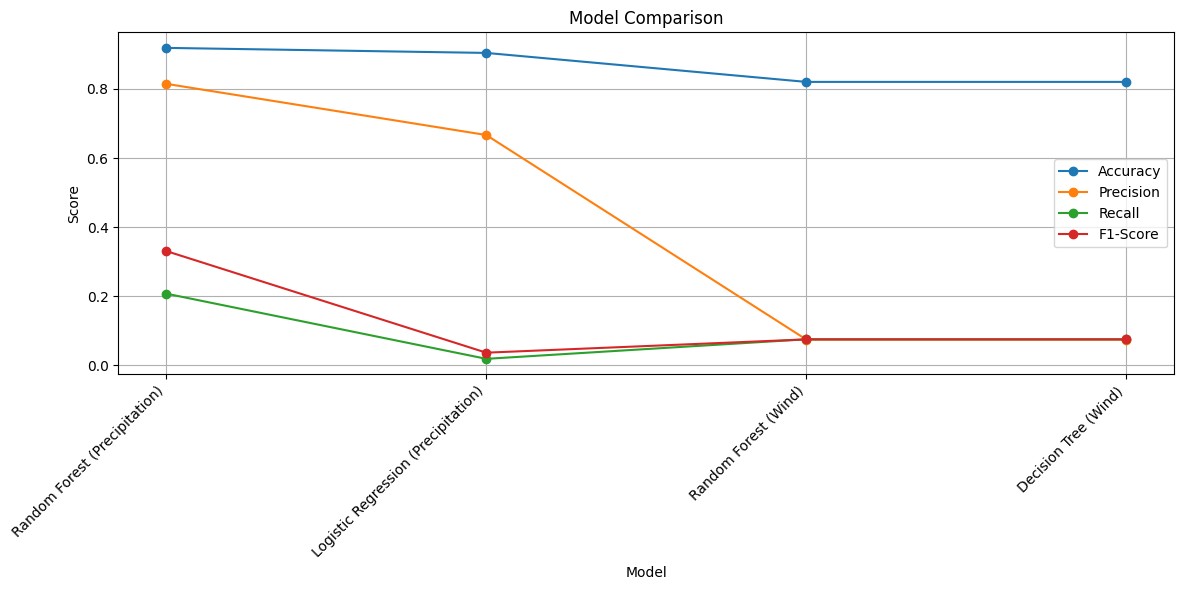

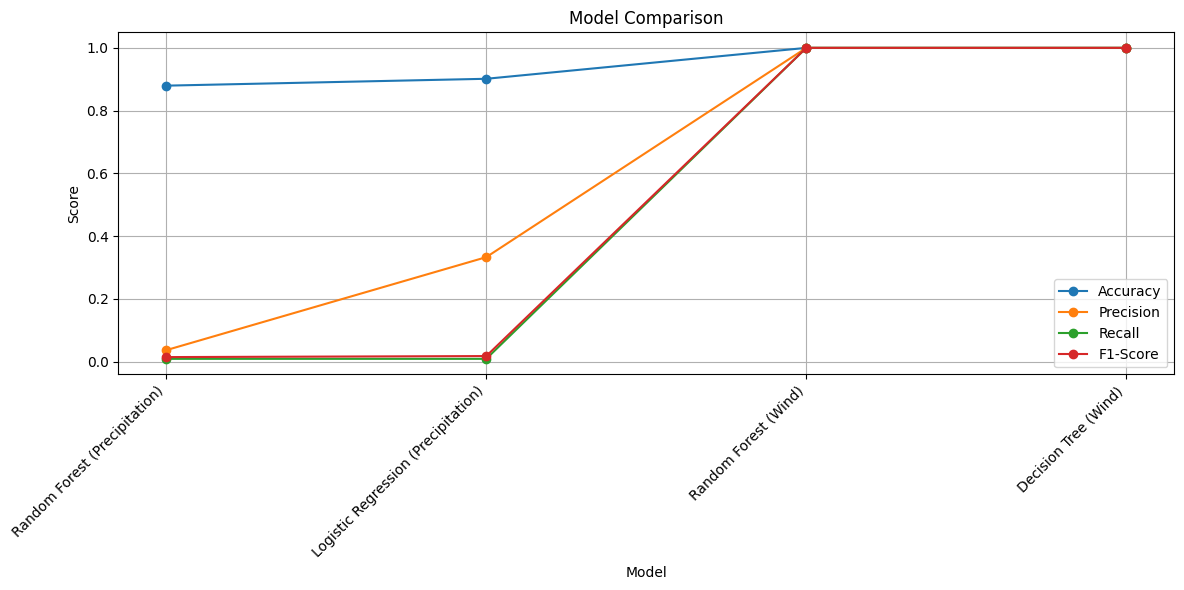

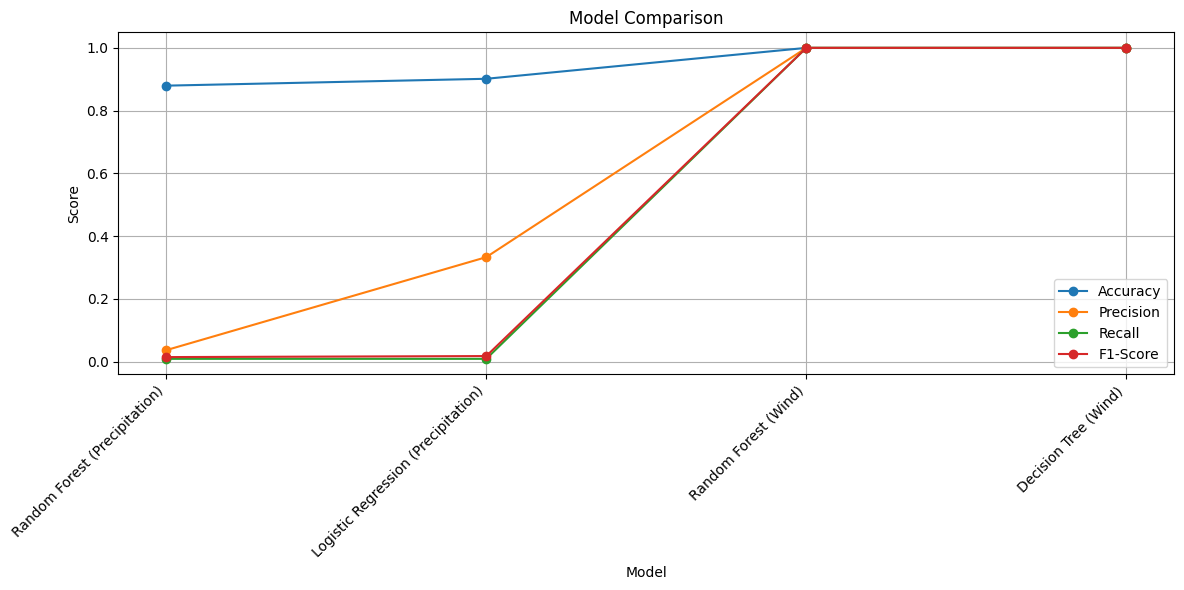

In [165]:
# Calling the function for each target variable
for X_test, y_test, model_name in zip(X_tests, y_tests, ModelNames):
  ModelComparisonPlottingFunction([models[i] for i in range(len(models))], X_test, y_test, ModelNames)